# <font color = 'red'> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

# <font color = 'Red'> Importing Data

In [2]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# <font color = 'red'> Performing EDA

###### Renaming Columns

In [3]:
data.rename({'YearsExperience':'Experience(Yrs)','Salary':'Salary(Rs)'},axis=1, inplace=True)
data

,Experience(Yrs),Salary(Rs)
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


###### Descriptive Stats

In [4]:
data.describe()

,Experience(Yrs),Salary(Rs)
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


###### Checking Datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Experience(Yrs)  30 non-null     float64
 1   Salary(Rs)       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


###### Checking for Null and Duplicate Values

In [6]:
data.isnull().sum()

Experience(Yrs)    0
Salary(Rs)         0
dtype: int64

In [7]:
data[data.duplicated()].shape

(0, 2)

In [8]:
data[data.duplicated()]

,Experience(Yrs),Salary(Rs)


###### Correlation between variables

In [9]:
data.corr()

,Experience(Yrs),Salary(Rs)
Experience(Yrs),1.000000,0.978242
Salary(Rs),0.978242,1.000000


###### 
+ As we can see the Collinearity between the predictor and response variable is 0.97 which is very good

# <font color = 'red'> Graphical Representation

<Figure size 10000x10000 with 0 Axes>

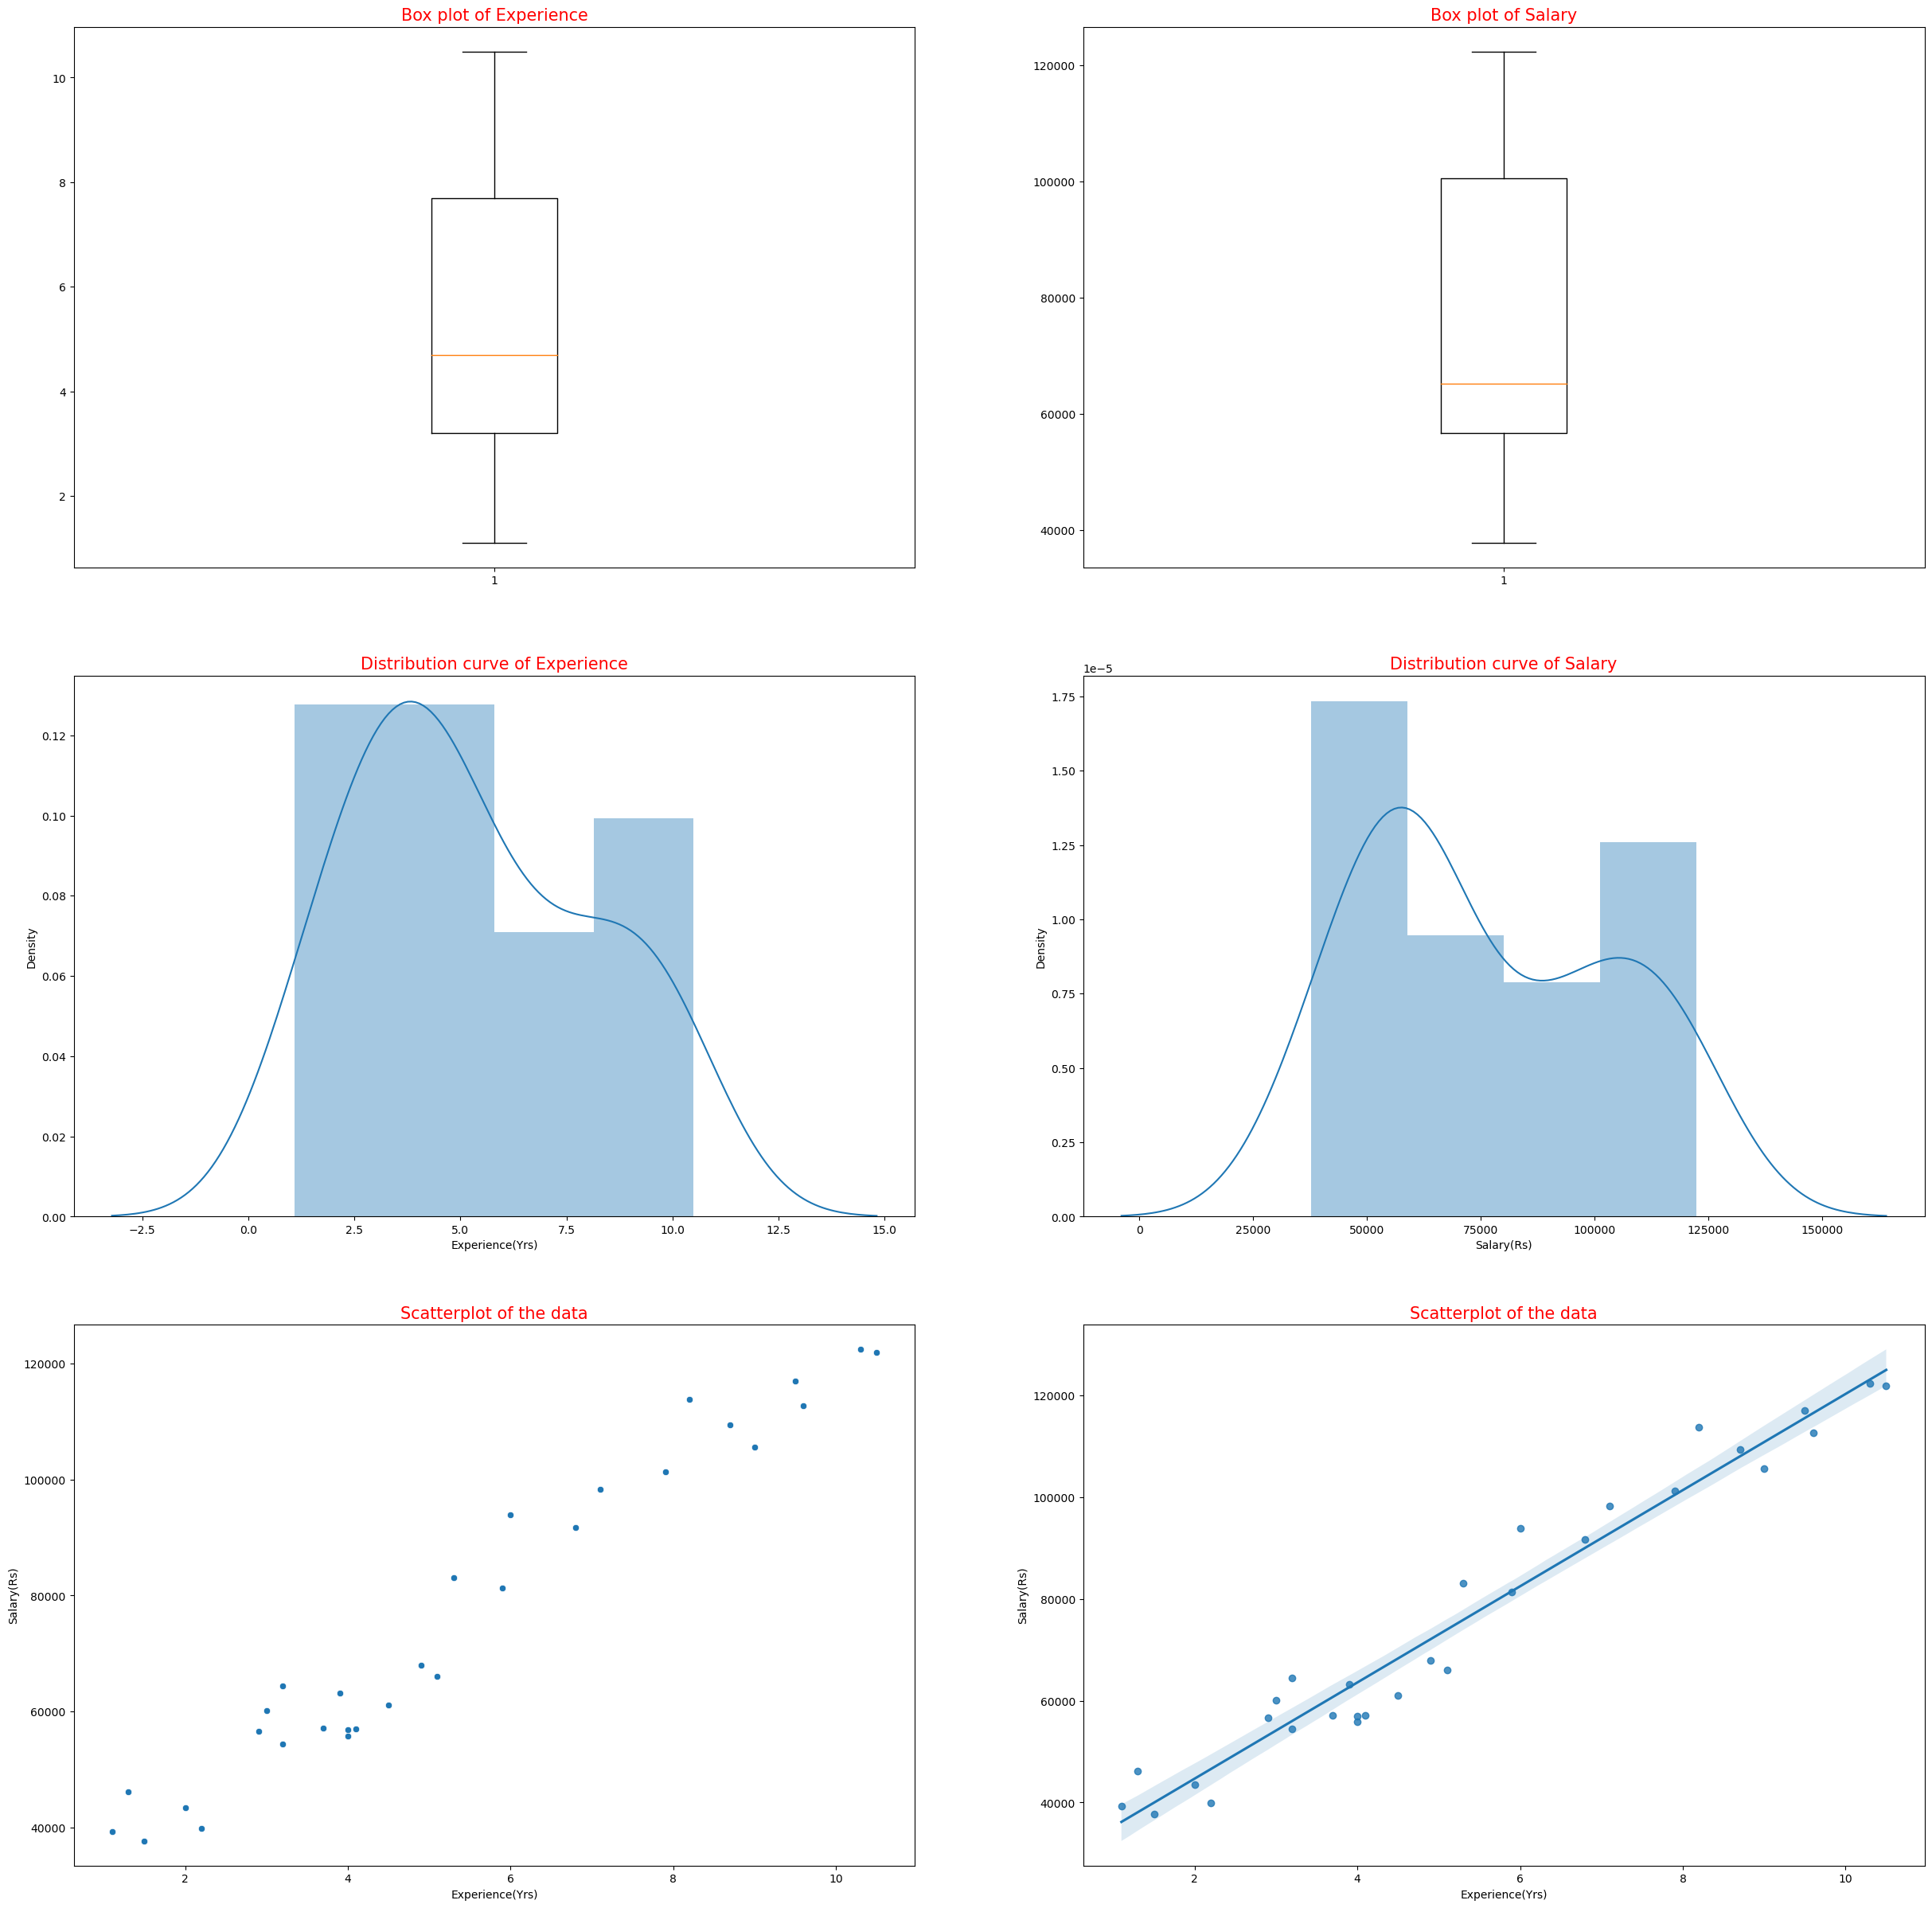

In [10]:
plt.figure(figsize=[100,100])
plt.subplots(3,2, figsize=(30,30))

plt.subplot(321)
plt.boxplot(data['Experience(Yrs)'])
plt.title('Box plot of Experience', fontdict={'fontsize':15,'color':'red'})

plt.subplot(322)
plt.boxplot(data['Salary(Rs)'])
plt.title('Box plot of Salary', fontdict={'fontsize':15,'color':'red'})

plt.subplot(323)
sns.distplot(data['Experience(Yrs)'], hist=True)
plt.title('Distribution curve of Experience', fontdict={'fontsize':15,'color':'red'})

plt.subplot(324)
sns.distplot(data['Salary(Rs)'], hist=True)
plt.title('Distribution curve of Salary', fontdict={'fontsize':15,'color':'red'})

plt.subplot(325)
sns.scatterplot(x=data['Experience(Yrs)'],y=data['Salary(Rs)'])
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.subplot(326)
sns.regplot(x=data['Experience(Yrs)'],y=data['Salary(Rs)'])
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.show()


###### Building Model

In [11]:
model = smf.ols("data['Salary(Rs)']~data['Experience(Yrs)']", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     data['Salary(Rs)']   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        20:04:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
data['Experience(Yrs)']  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


+ We can see the r-squared value is 0.957,It is a thumb rule that the r-squared value should be >0.85 for the model to be considered as a good model
+ So it is a very good model
+ But we can see the Distribution curve of the variables are not perfectly NORMAL, So we perform Data Transformation on Variables and check whether we can get better r-squared and adj r-squared values

# <font color = 'red'> DATA TRANSFORMATION AND VISUALIZATION

## <font color = 'green'> LOG Transformation

<Figure size 10000x10000 with 0 Axes>

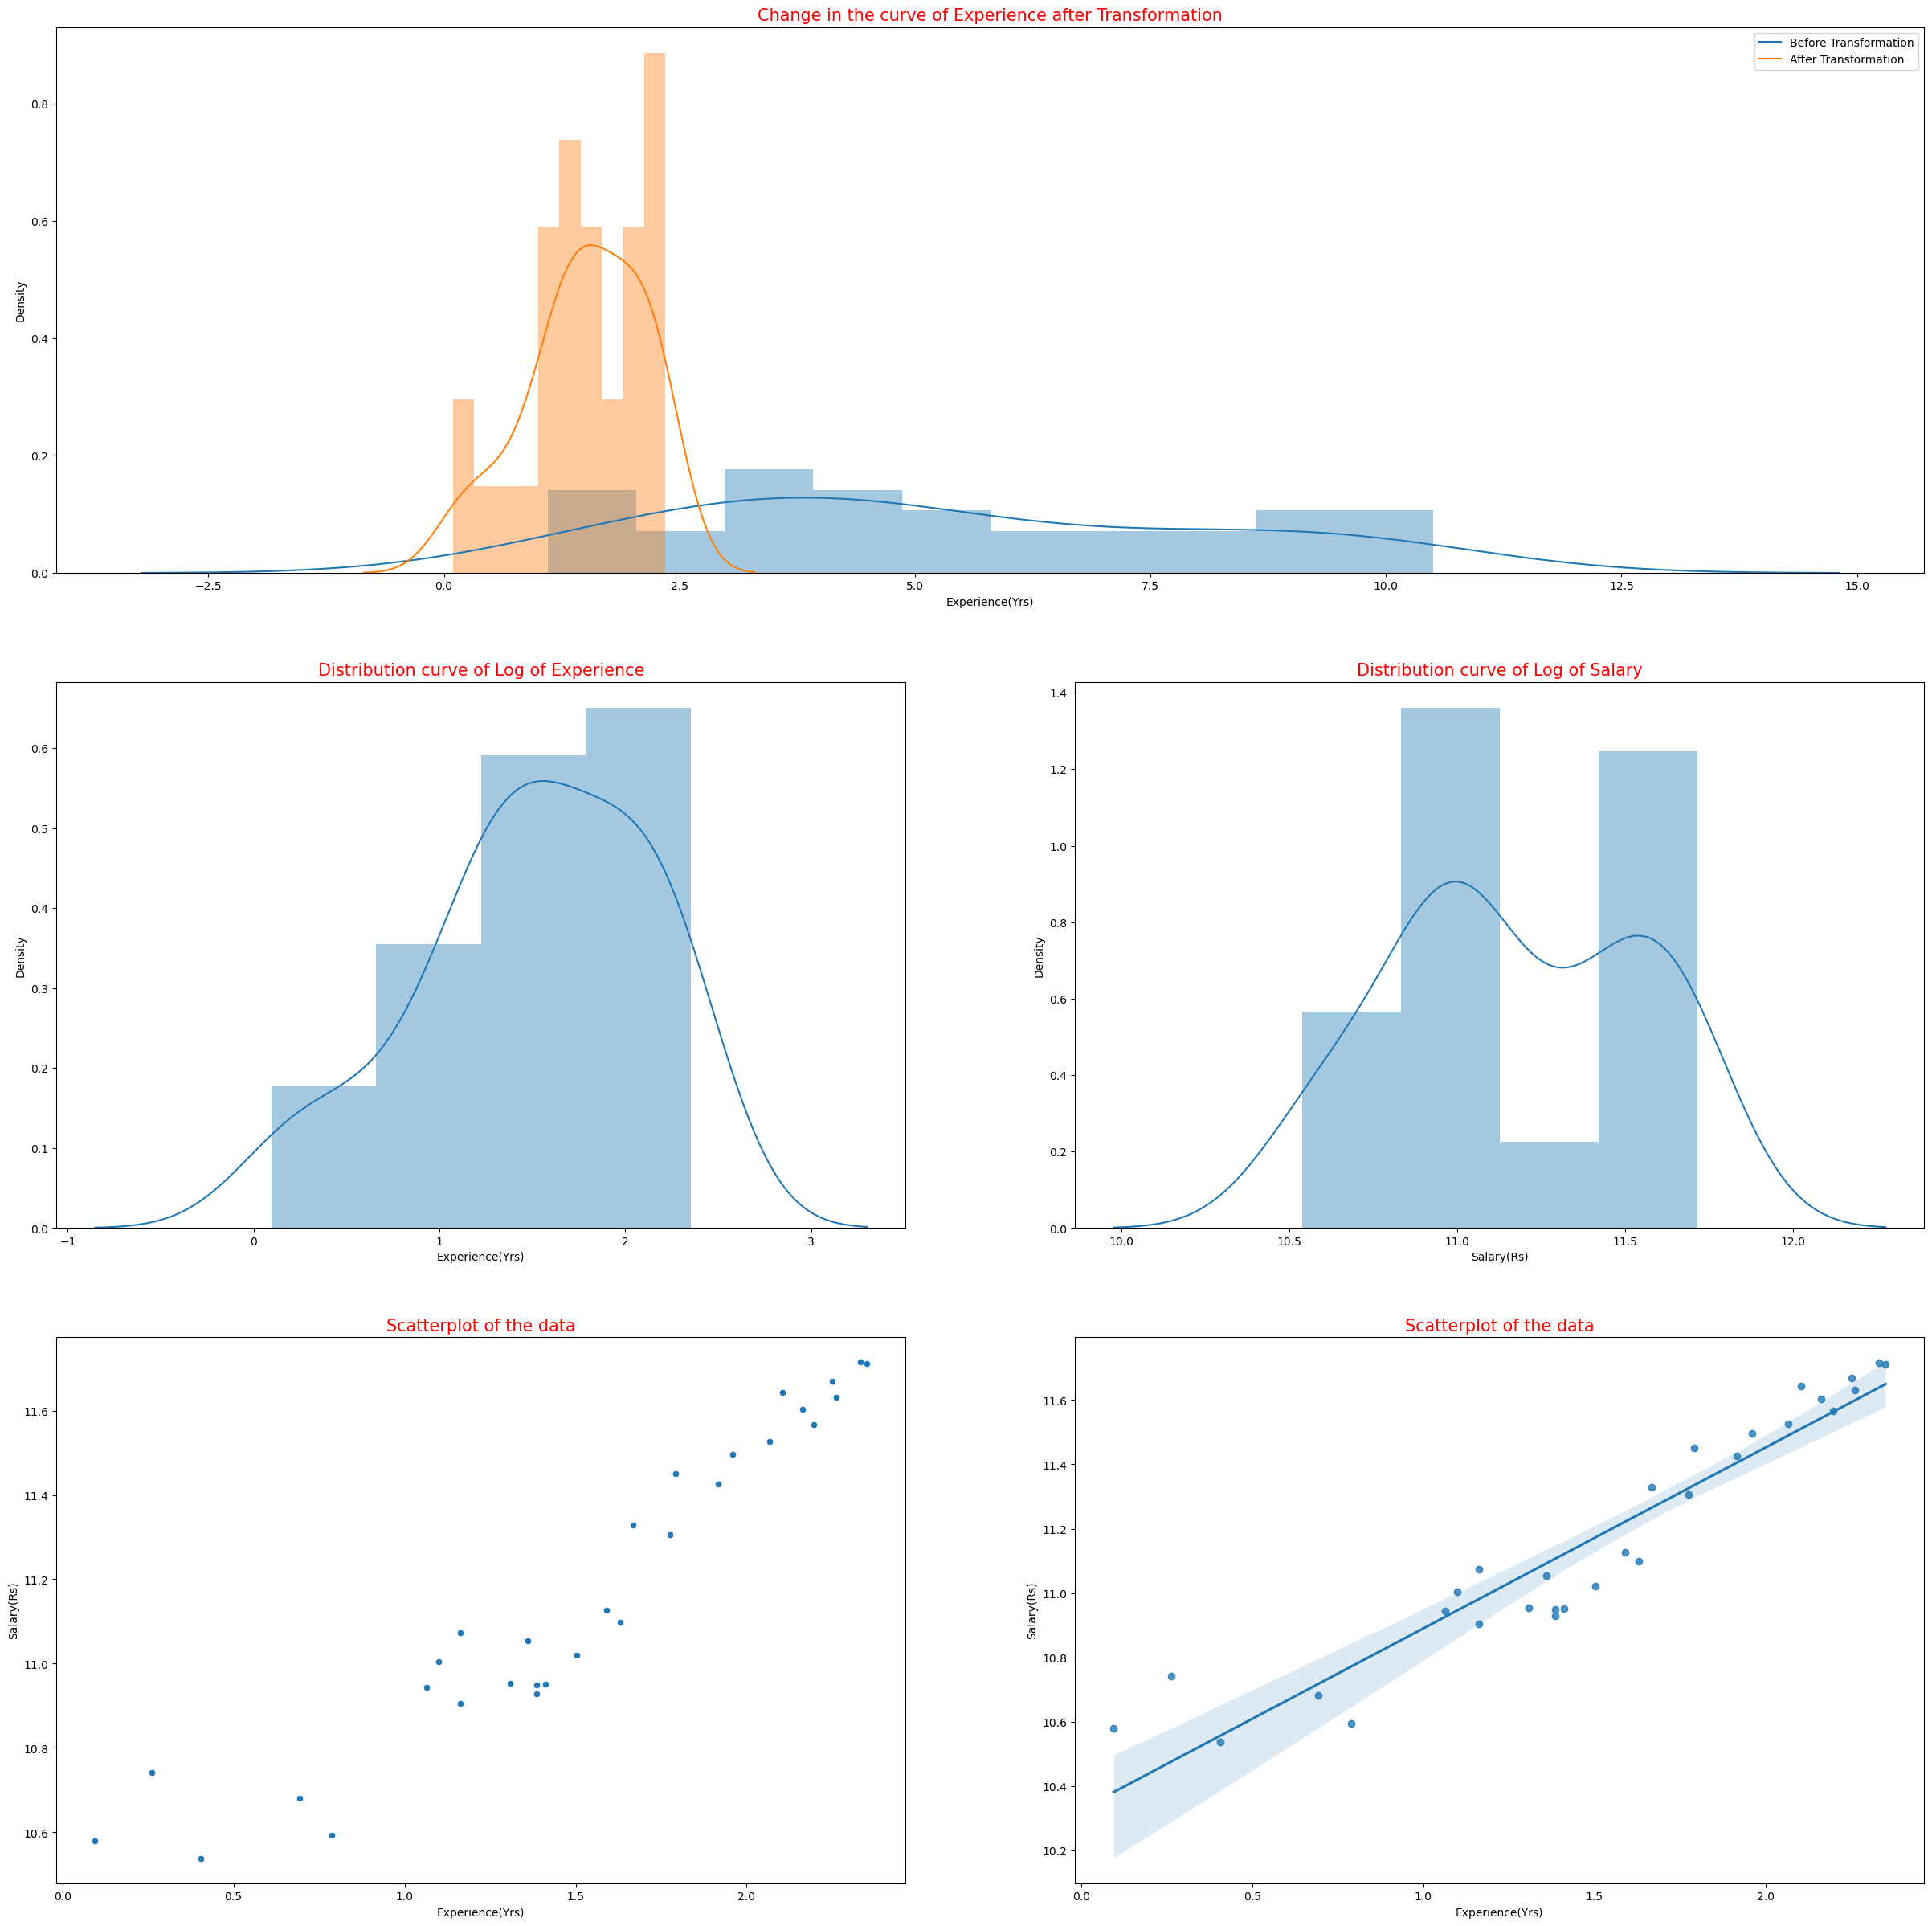

In [12]:
plt.figure(figsize=[100,100])
plt.subplots(2,2, figsize=(30,30))

plt.subplot(311)
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Experience(Yrs)'], bins = 10, kde = True)
sns.distplot(np.log(data['Experience(Yrs)']), bins = 10, kde = True)
plt.legend(labels)
plt.title('Change in the curve of Experience after Transformation', fontdict={'fontsize':15,'color':'red'})


plt.subplot(323)
sns.distplot(np.log(data['Experience(Yrs)']), hist=True)
plt.title('Distribution curve of Log of Experience', fontdict={'fontsize':15,'color':'red'})

plt.subplot(324)
sns.distplot(np.log(data['Salary(Rs)']), hist=True)
plt.title('Distribution curve of Log of Salary', fontdict={'fontsize':15,'color':'red'})

plt.subplot(325)
sns.scatterplot(x=np.log(data['Experience(Yrs)']),y=np.log(data['Salary(Rs)']))
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.subplot(326)
sns.regplot(x=np.log(data['Experience(Yrs)']),y=np.log(data['Salary(Rs)']))
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.show()


In [13]:
model1 = smf.ols("np.log(data['Salary(Rs)'])~np.log(data['Experience(Yrs)'])", data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(data['Salary(Rs)'])   R-squared:                       0.905
Model:                                    OLS   Adj. R-squared:                  0.902
Method:                         Least Squares   F-statistic:                     267.4
Date:                        Sat, 11 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                                20:04:13   Log-Likelihood:                 23.209
No. Observations:                          30   AIC:                            -42.42
Df Residuals:                              28   BIC:                            -39.61
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          10.3280      0.056    184.868      0.000      10.214      10.442
np.log(data['Experience(Yrs)'])     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = 'green'> SQUARE ROOT Transformation

<Figure size 10000x10000 with 0 Axes>

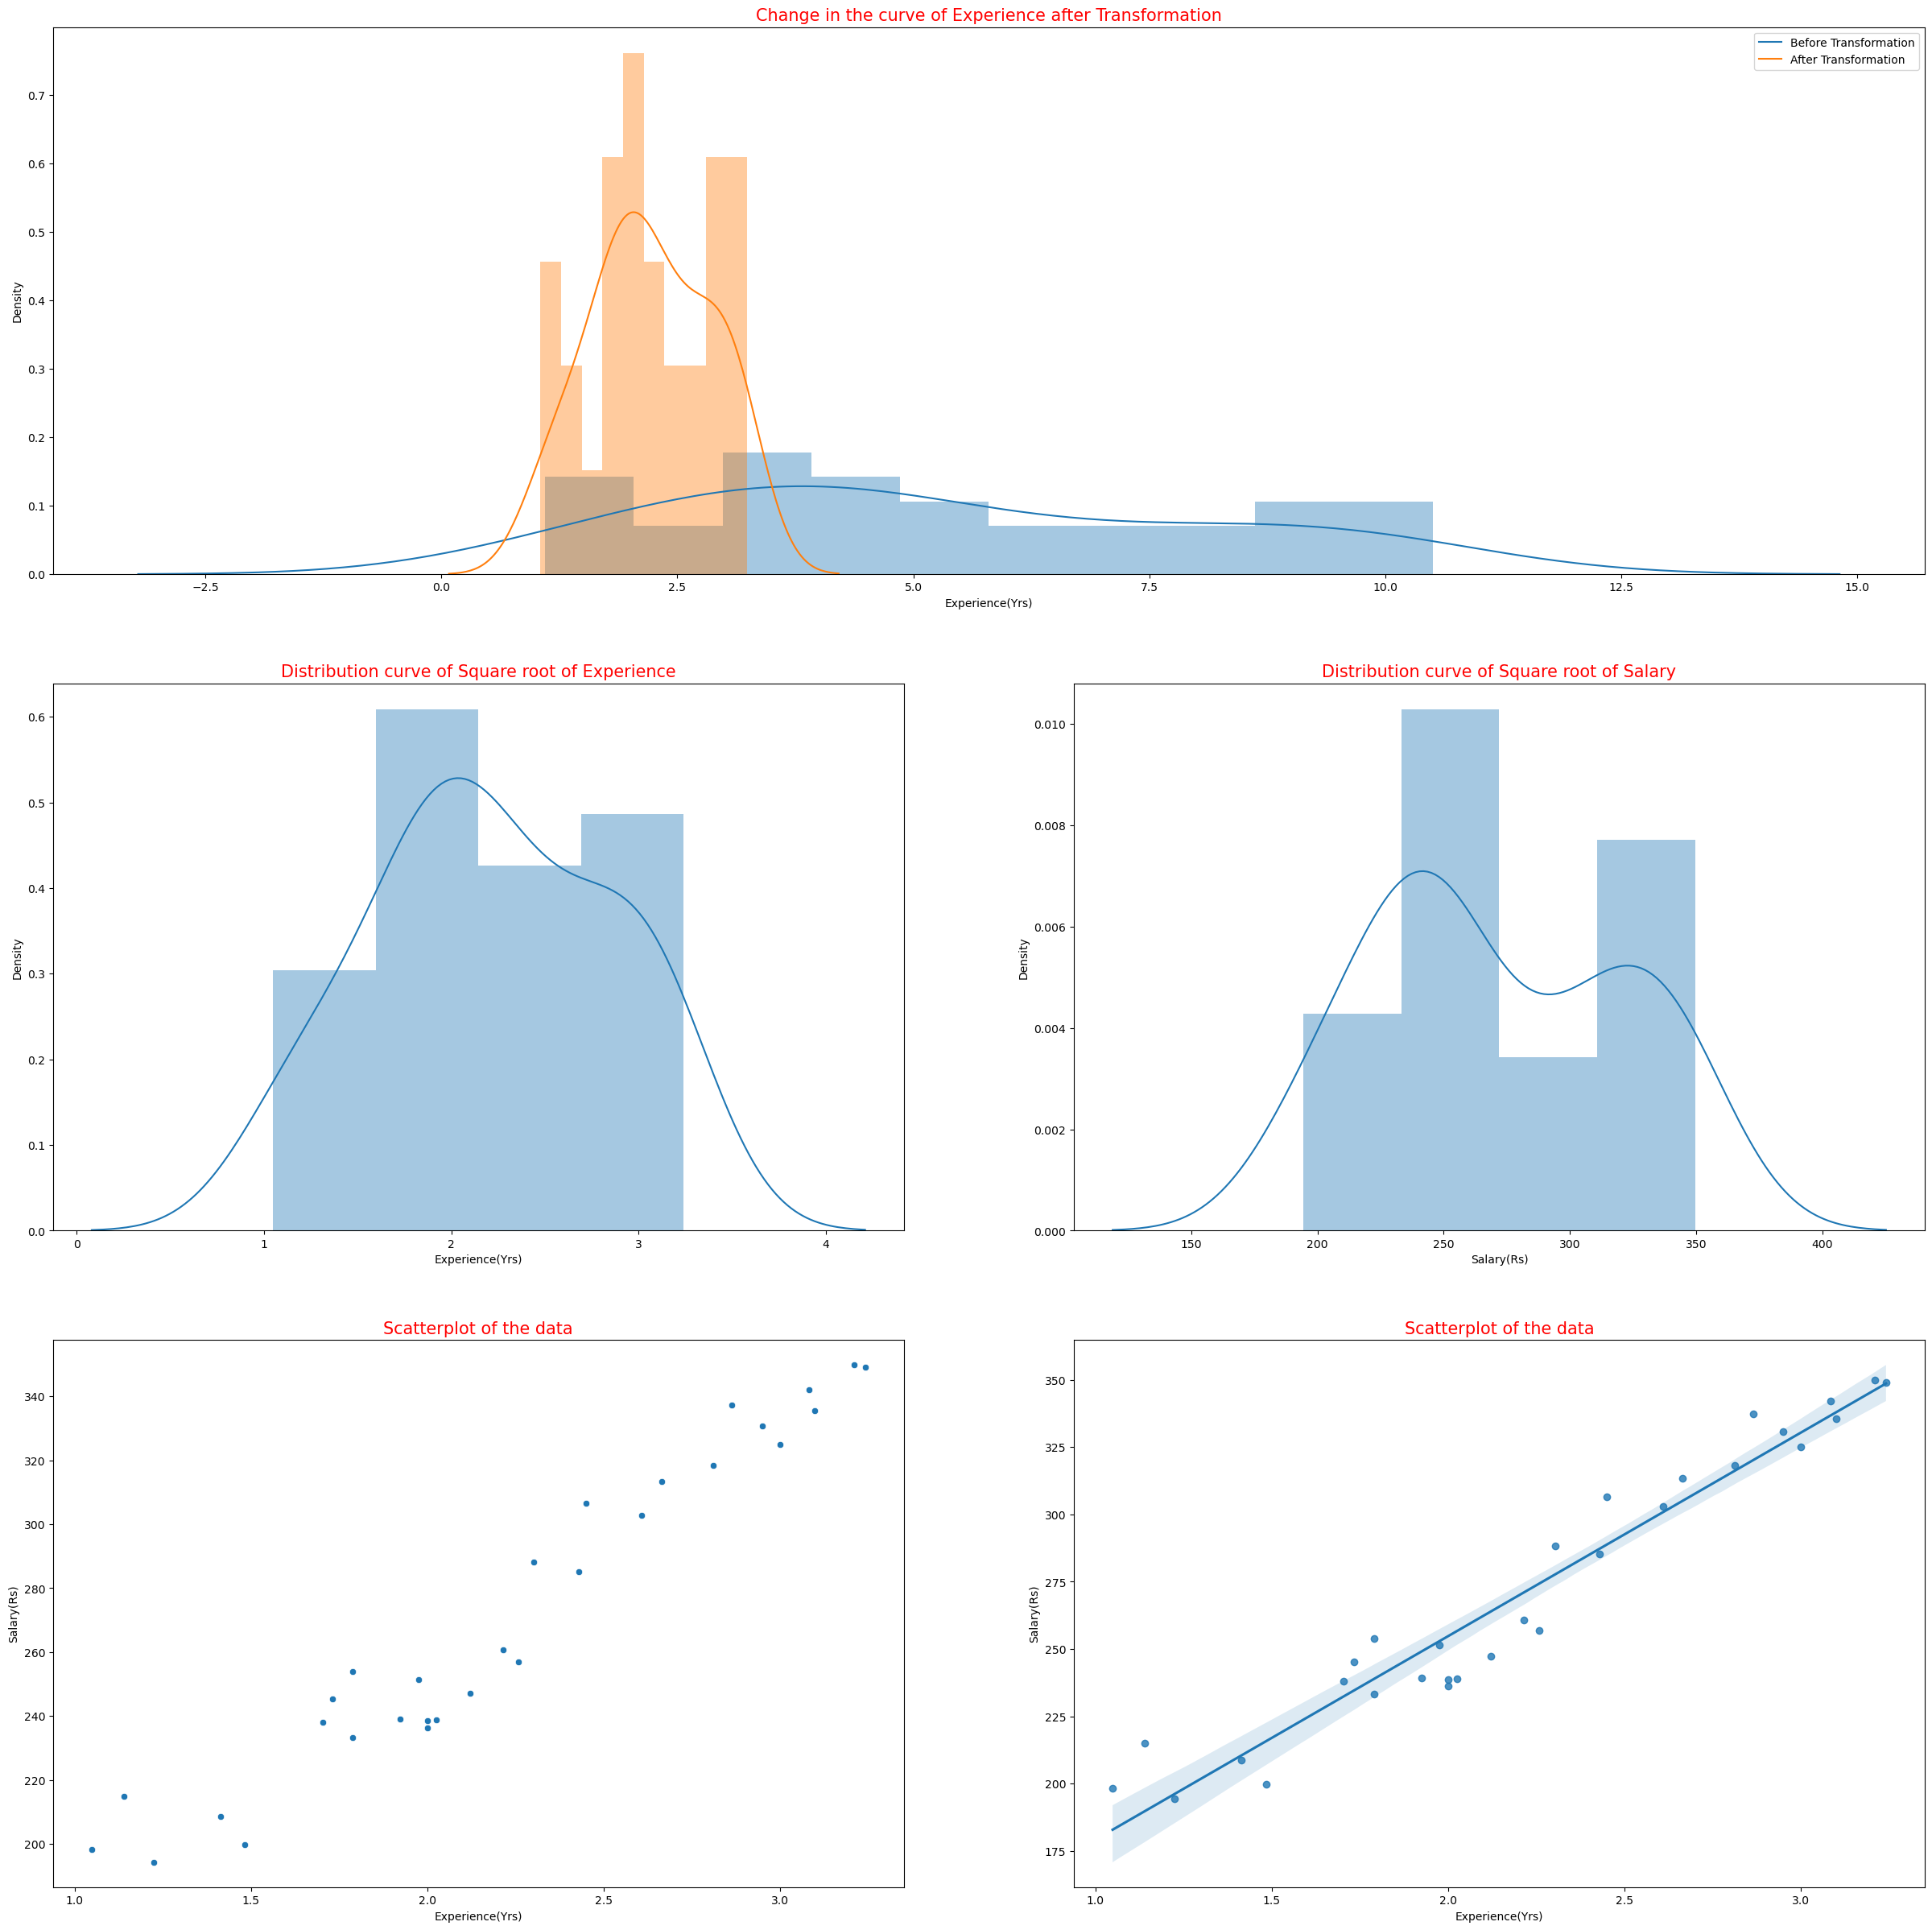

In [14]:
plt.figure(figsize=[100,100])
plt.subplots(2,2, figsize=(30,30))

plt.subplot(311)
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Experience(Yrs)'], bins = 10, kde = True)
sns.distplot(np.sqrt(data['Experience(Yrs)']), bins = 10, kde = True)
plt.legend(labels)
plt.title('Change in the curve of Experience after Transformation', fontdict={'fontsize':15,'color':'red'})


plt.subplot(323)
sns.distplot(np.sqrt(data['Experience(Yrs)']), hist=True)
plt.title('Distribution curve of Square root of Experience', fontdict={'fontsize':15,'color':'red'})

plt.subplot(324)
sns.distplot(np.sqrt(data['Salary(Rs)']), hist=True)
plt.title('Distribution curve of Square root of Salary', fontdict={'fontsize':15,'color':'red'})

plt.subplot(325)
sns.scatterplot(x=np.sqrt(data['Experience(Yrs)']),y=np.sqrt(data['Salary(Rs)']))
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.subplot(326)
sns.regplot(x=np.sqrt(data['Experience(Yrs)']),y=np.sqrt(data['Salary(Rs)']))
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.show()


In [15]:
model2 = smf.ols("np.sqrt(data['Salary(Rs)'])~np.sqrt(data['Experience(Yrs)'])", data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.sqrt(data['Salary(Rs)'])   R-squared:                       0.942
Model:                                     OLS   Adj. R-squared:                  0.940
Method:                          Least Squares   F-statistic:                     454.3
Date:                         Sat, 11 Feb 2023   Prob (F-statistic):           7.58e-19
Time:                                 20:04:14   Log-Likelihood:                -116.52
No. Observations:                           30   AIC:                             237.0
Df Residuals:                               28   BIC:                             239.8
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(data['Experience(Yrs)'])    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = 'green'> CUBE ROOT Transformation

<Figure size 10000x10000 with 0 Axes>

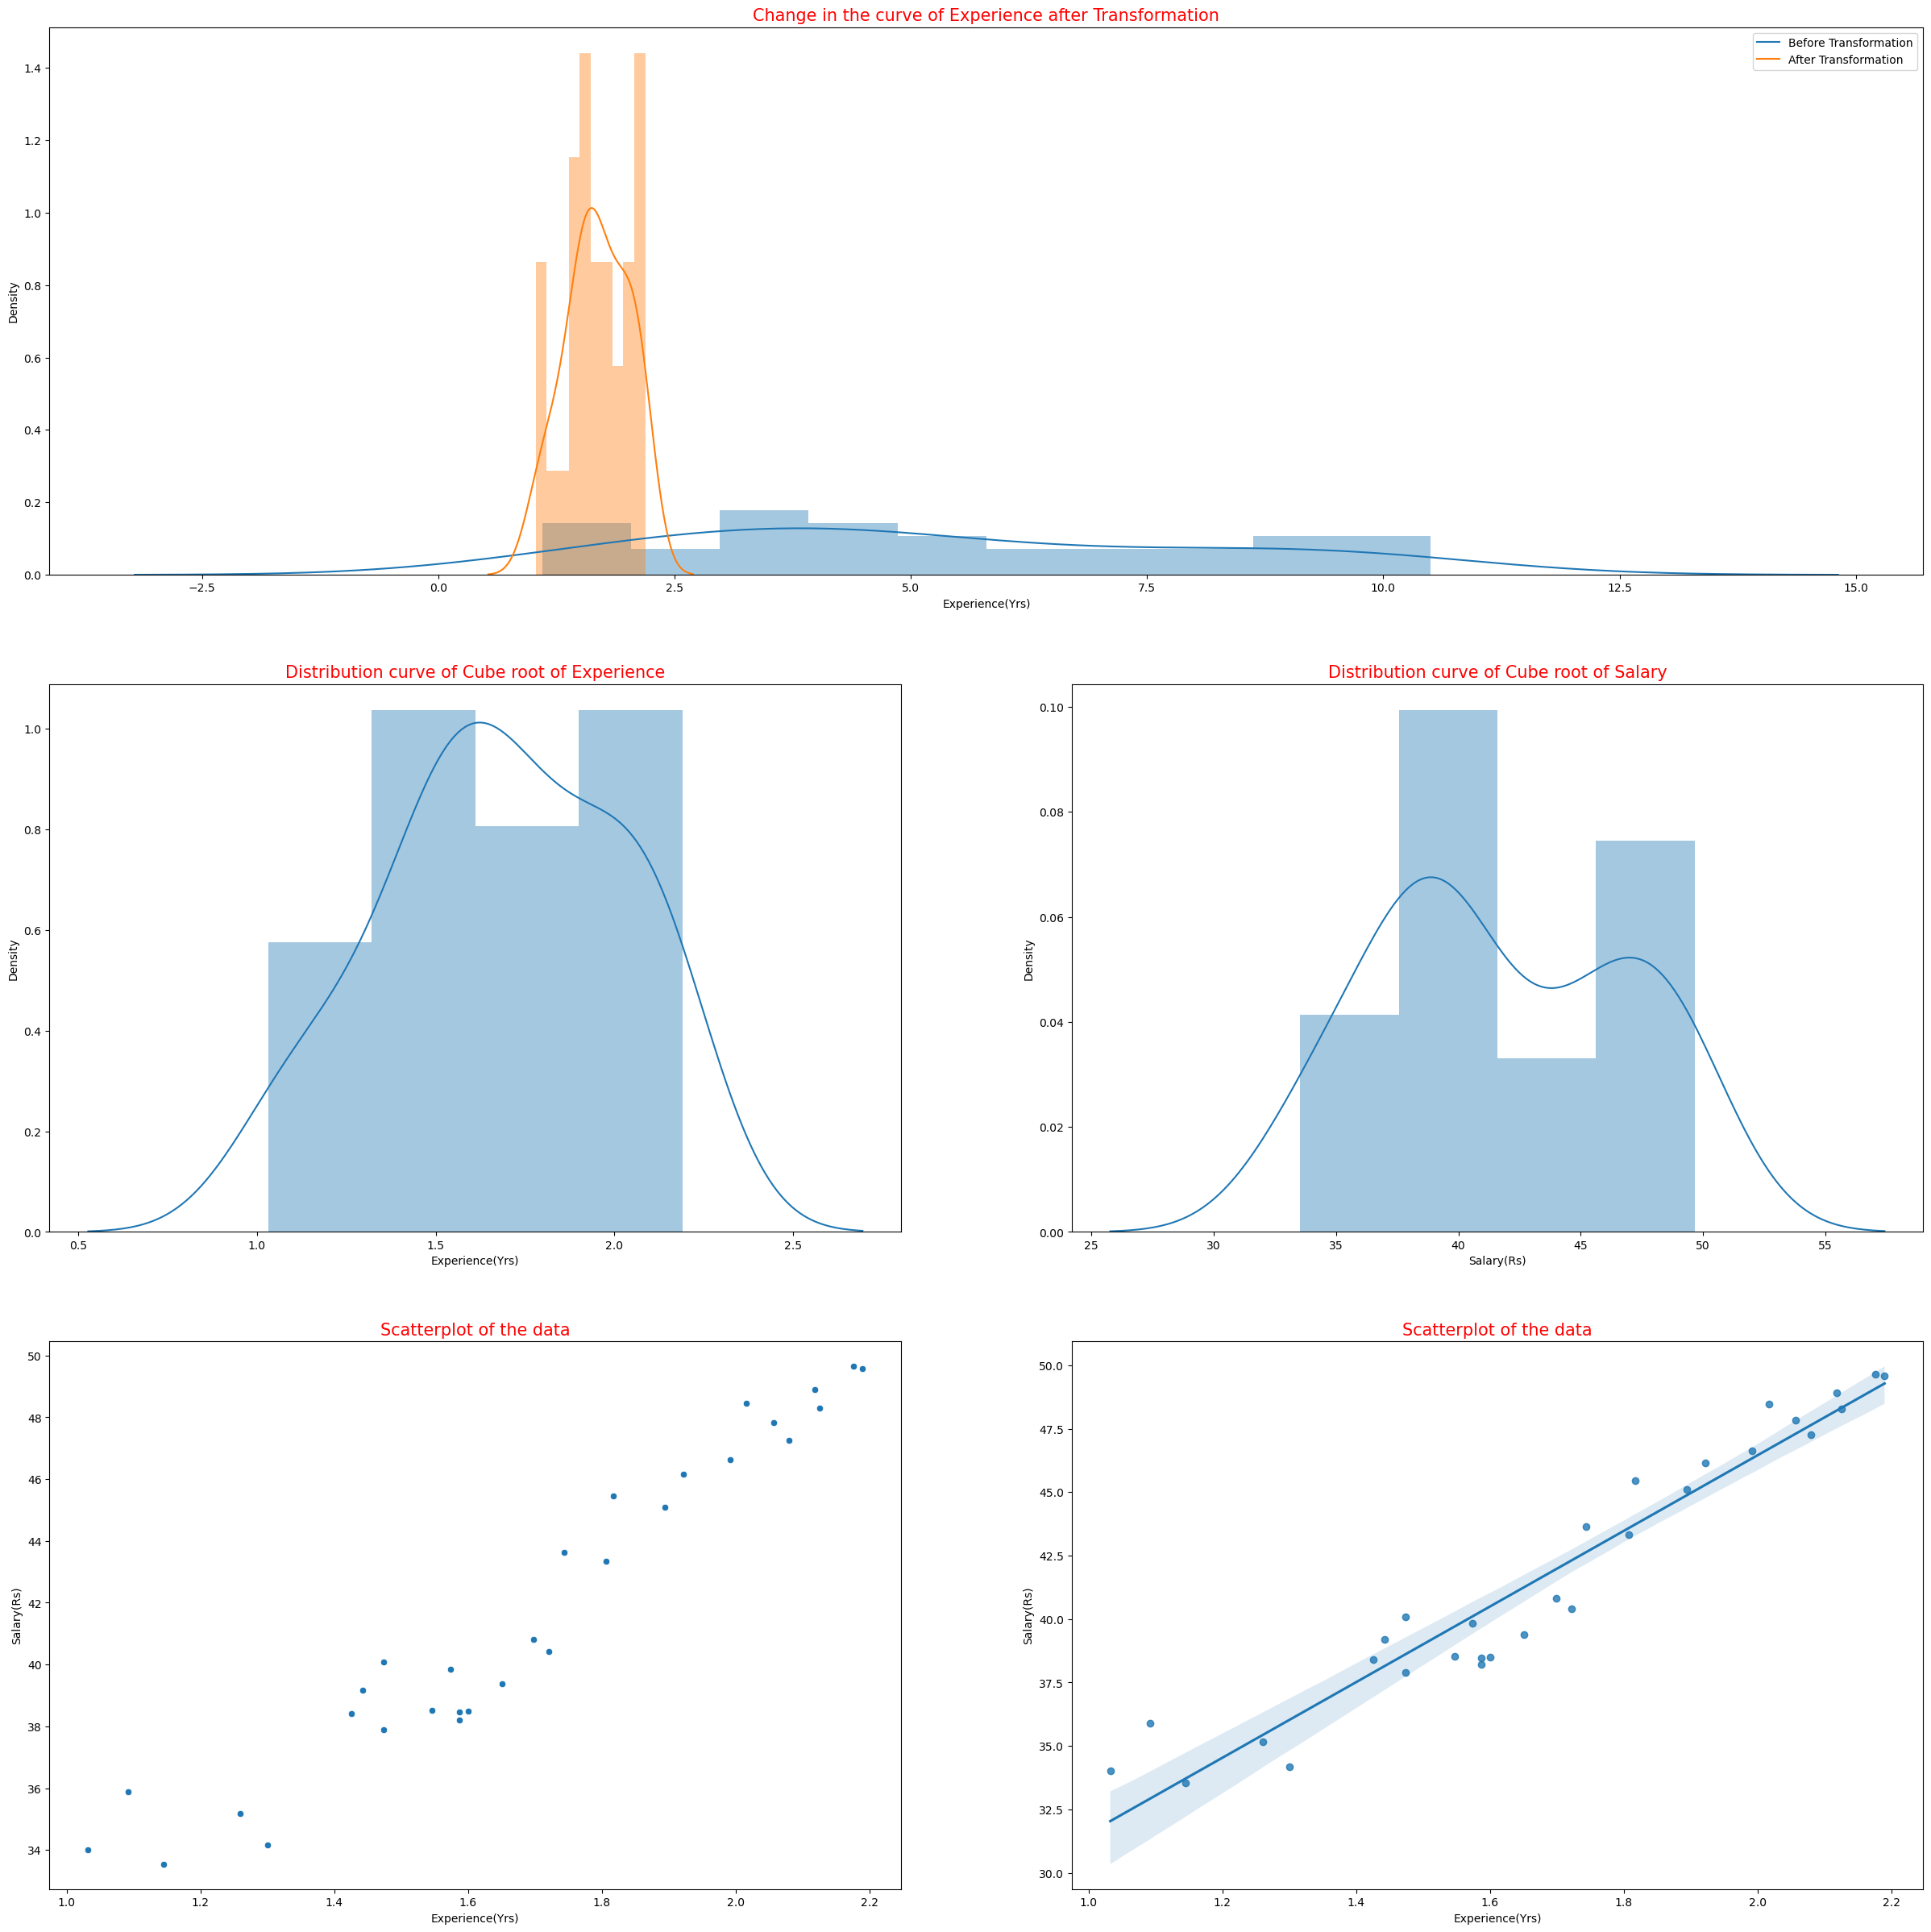

In [16]:
plt.figure(figsize=[100,100])
plt.subplots(2,2, figsize=(30,30))

plt.subplot(311)
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Experience(Yrs)'], bins = 10, kde = True)
sns.distplot(np.cbrt(data['Experience(Yrs)']), bins = 10, kde = True)
plt.legend(labels)
plt.title('Change in the curve of Experience after Transformation', fontdict={'fontsize':15,'color':'red'})


plt.subplot(323)
sns.distplot(np.cbrt(data['Experience(Yrs)']), hist=True)
plt.title('Distribution curve of Cube root of Experience', fontdict={'fontsize':15,'color':'red'})

plt.subplot(324)
sns.distplot(np.cbrt(data['Salary(Rs)']), hist=True)
plt.title('Distribution curve of Cube root of Salary', fontdict={'fontsize':15,'color':'red'})

plt.subplot(325)
sns.scatterplot(x=np.cbrt(data['Experience(Yrs)']),y=np.cbrt(data['Salary(Rs)']))
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.subplot(326)
sns.regplot(x=np.cbrt(data['Experience(Yrs)']),y=np.cbrt(data['Salary(Rs)']))
plt.title('Scatterplot of the data', fontdict={'fontsize':15,'color':'red'})

plt.show()


In [17]:
model3 = smf.ols("np.cbrt(data['Salary(Rs)'])~np.cbrt(data['Experience(Yrs)'])", data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.cbrt(data['Salary(Rs)'])   R-squared:                       0.932
Model:                                     OLS   Adj. R-squared:                  0.930
Method:                          Least Squares   F-statistic:                     386.5
Date:                         Sat, 11 Feb 2023   Prob (F-statistic):           6.37e-18
Time:                                 20:04:16   Log-Likelihood:                -50.589
No. Observations:                           30   AIC:                             105.2
Df Residuals:                               28   BIC:                             108.0
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(data['Experience(Yrs)'])    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the first model
+ Pre-Transformed Model has scored the highest R-squared and Adjusted R-squared scores than the other models
+ So it is the Best model

### Model Testing
#### As Y = Beta0 + Beta1*(X)
#### Finding Coefficient Parameters (Beta0 and Beta1 values)

In [18]:
model.params

Intercept                  25792.200199
data['Experience(Yrs)']     9449.962321
dtype: float64

#### Here, (Intercept) Beta0 value = 25792.20 & Beta1 value = 9449.96
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [19]:
print('t-values \n',model.tvalues, 't-values \n', model.pvalues)

t-values 
 Intercept                  11.346940
data['Experience(Yrs)']    24.950094
dtype: float64 t-values 
 Intercept                  5.511950e-12
data['Experience(Yrs)']    1.143068e-20
dtype: float64


#### (Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12
#### (Experience)     Beta1: tvalue=24.950094, pvalue= 1.143068e-20
#### As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Experience) variable has good slope and variance w.r.t Y(Salary) variable. 
#### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
#### Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [20]:
model.rsquared,model.rsquared_adj


(0.9569566641435086, 0.9554194021486339)

### Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

# <font color = 'red'> Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

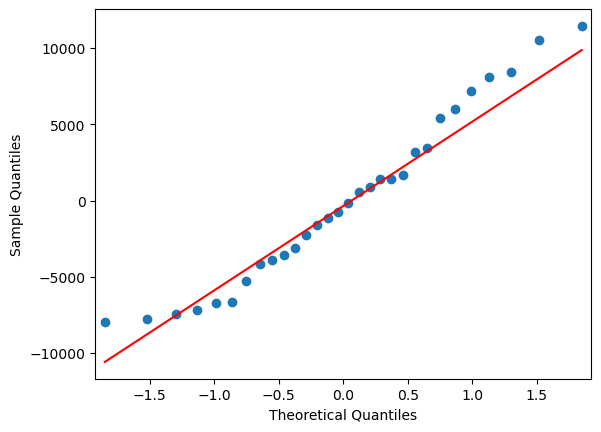

In [21]:
sm.qqplot(model.resid, line='q')
plt.show()

###### 
+ The Residual curve is almost Normal with slightly Right Skewed

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [22]:
def get_standard_values(vals):
    return (vals-vals.mean())/(vals.std())

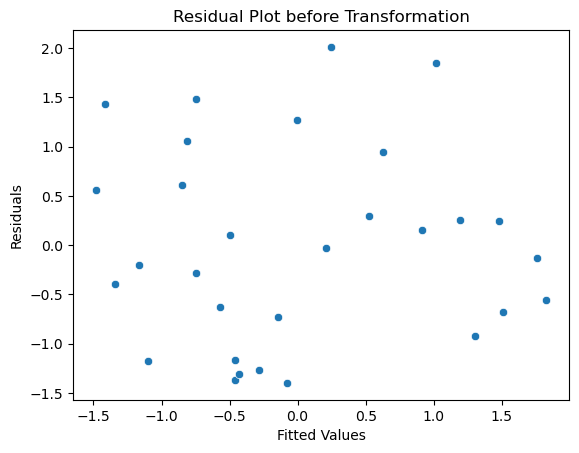

In [23]:
sns.scatterplot(x= get_standard_values(model.fittedvalues), y= get_standard_values(model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot before Transformation')
plt.show()

## <font color='red'> As you can notice in the above plot
+ The Model have Homoscedasciticity of Errors. 
+ The Residual(i.e Residual  = Actual Value - Predicted Value) and the Fitted values do not share any Pattern. 
+ Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

## <font color = 'red'> Model Validation

### Comparing different models with respect to their Root Mean Squared Errors
### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)

In [24]:
model_pred = model.predict(data['Experience(Yrs)'])
model1_pred = np.exp(model1.predict(data['Experience(Yrs)']))
model2_pred = np.square(model2.predict(data['Experience(Yrs)']))
model3_pred = pow(model3.predict(data['Experience(Yrs)']),3)

In [25]:
model1_rms = np.sqrt(mean_squared_error(data['Salary(Rs)'],model1_pred))
model2_rms = np.sqrt(mean_squared_error(data['Salary(Rs)'],model2_pred))
model3_rms = np.sqrt(mean_squared_error(data['Salary(Rs)'],model3_pred))

In [26]:
print('RMSE value of \n Pre-Transformed model=', np.sqrt(model.mse_resid),'\n Log model =',model1_rms,'\n Square root model=',model2_rms, '\n Cube root model=',model3_rms)

RMSE value of 
 Pre-Transformed model= 5788.315051119395 
 Log model = 7219.716974372802 
 Square root model= 5960.647096174311 
 Cube root model= 6232.8154558358565


In [27]:
best_model = {'Pre-Transformed(model)': np.sqrt(model.mse_resid),'Log model(model1)' : model1_rms, 'square root model(model2)':model2_rms , 'cube root model(model3)': model3_rms }
print('The best model is :' ,min(best_model, key=best_model.get))

The best model is : Pre-Transformed(model)


## <font color='red'>As Pre-Transformed model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values 


##### <font color = 'green'>  Predicting values from the Best Model i.e, Pre-Transformed Model

In [28]:
Predicted = pd.DataFrame()
Predicted['Experience(Yrs)'] = data['Experience(Yrs)']
Predicted['Salary(Rs)'] = data['Salary(Rs)']
Predicted['Predicted Salary(Rs)'] = model_pred
Predicted

,Experience(Yrs),Salary(Rs),Predicted Salary(Rs)
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
